# Simulating a Brownian motion

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson

For a Brownian motion, the increments $B(t)-B(s)$ are normally distributed with mean 0 an variance $t-s$. We can then simulate a Brownian motion by simulating normal random variables. In particular, we will simulate the increments $B(t+\Delta t) -B(t)$ for small $\Delta t$.

In [22]:
def GeneratePathsBM(NoOfSteps, T, NoOfPaths = 1):    
    # We simulate unit normal random variables, Z_i
    Z = np.random.normal(loc = 0.0, scale = 1.0, size = [NoOfPaths, NoOfSteps])
    
    # We define an empty matrix (vector of zeros) for the BM
    BM = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
        
    dt = T / float(NoOfSteps)
    
    # We use the recursive formula from the notes
    for i in range(0,NoOfSteps):
        BM[:,i+1] = BM[:,i] + np.sqrt(dt)*Z[:,i] # here the time step is constant
        time[i+1] = time[i] + dt
    
    paths = {"time":time, "BM":BM}
    
    return paths

In [26]:
# Define the parameters
T = 1 # Terminal time
m = 1000 # Number of steps 
N = 5 # Number of paths

In [27]:
# We use the function GeneratePathsBM to generate paths of BM
paths = GeneratePathsBM(m, T, N)
timeGrid = paths['time']
B = paths['BM']

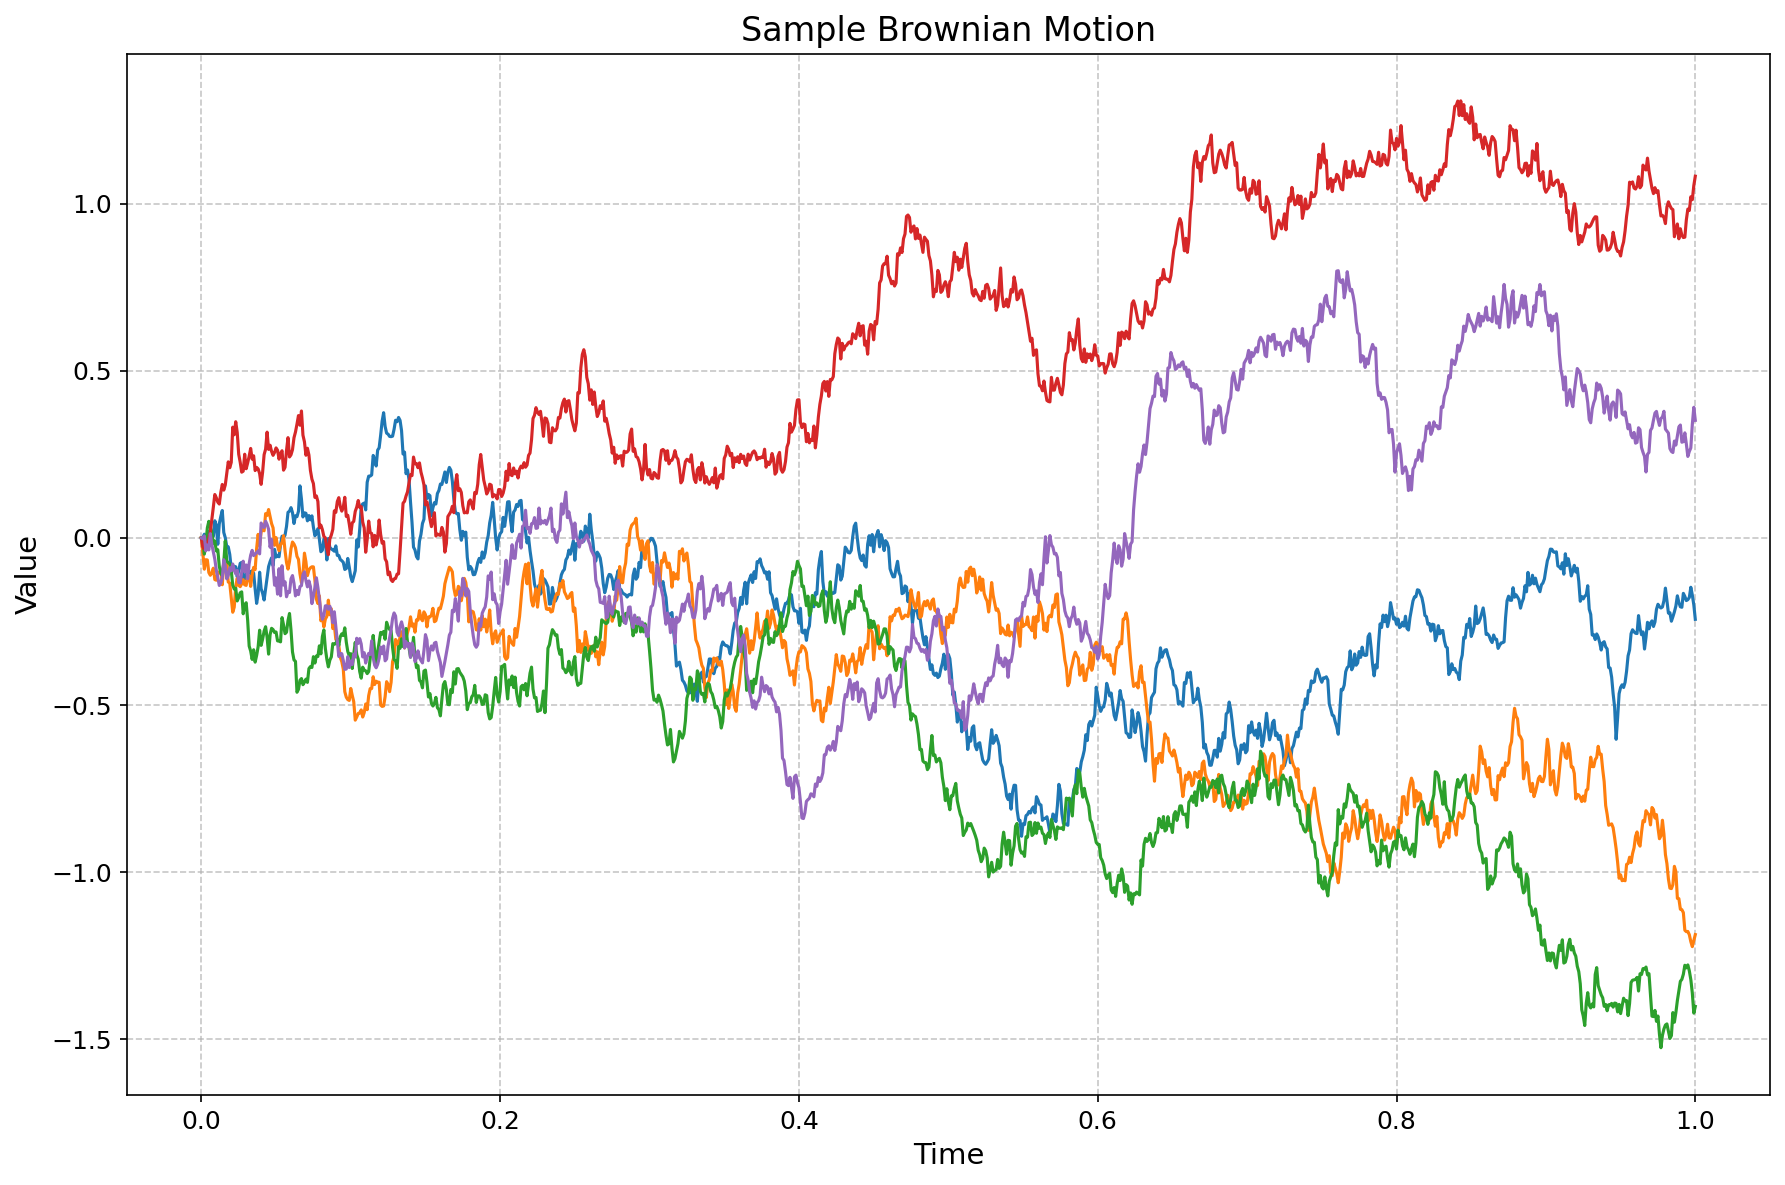

In [28]:
plt.figure(figsize=(12, 8), dpi=150)  # Larger size and higher DPI
plt.plot(timeGrid, np.transpose(B))
plt.grid(True, linestyle='--', alpha=0.7)  # Dashed grid for subtle appearance
plt.title("Sample Brownian Motion", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to fit elements nicely
plt.show()

## Simulating a GBM

We will now simulate a GBM $S$. 
We know that 
\begin{equation}
S(t) = S(t_0)\exp\{ (\mu - \frac{\sigma^2}{2}) (t-t_0) + \sigma (B(t)-B(t_0))\}.
\end{equation}
Hence
\begin{equation}
S(t_i) = S(t_{i-1})\exp\{(\mu - \frac{\sigma^2}{2})\Delta t + \sigma \Delta B(t_i)\}.
\end{equation}
We then first simulate a BM with drift and then take the exponential.

In [29]:
def GeneratePathsGBM(NoOfSteps, T, mu, sigma, S_0, NoOfPaths = 1):    
    Z = np.random.normal(loc = 0.0, scale = 1.0, size = [NoOfPaths, NoOfSteps])
    
    # We define X which is our BM with drift
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
        
    X[:,0] = np.log(S_0)
    
    dt = T / float(NoOfSteps)
    
    # We use the recursive formula from the notes
    for i in range(0,NoOfSteps):
        X[:,i+1] = X[:,i] + (mu - 0.5 * sigma**2) * dt + sigma * np.power(dt, 0.5)*Z[:,i]
        time[i+1] = time[i] + dt
        
    # Compute the exponent of X
    S = np.exp(X)
    
    paths = {"time":time,"S":S}
    
    return paths

In [39]:
# Define the parameters
T = 1 # Terminal time
m = 1000 # Number of points - 1
N = 15 # Number of paths
sigma = 1
mu = 0.5
S0 = 100

In [40]:
# We use the function GeneratePathsGBM to generate paths of the geometric BM
paths = GeneratePathsGBM(m, T, mu, sigma, S0, N)
timeGrid = paths['time']
S = paths['S']

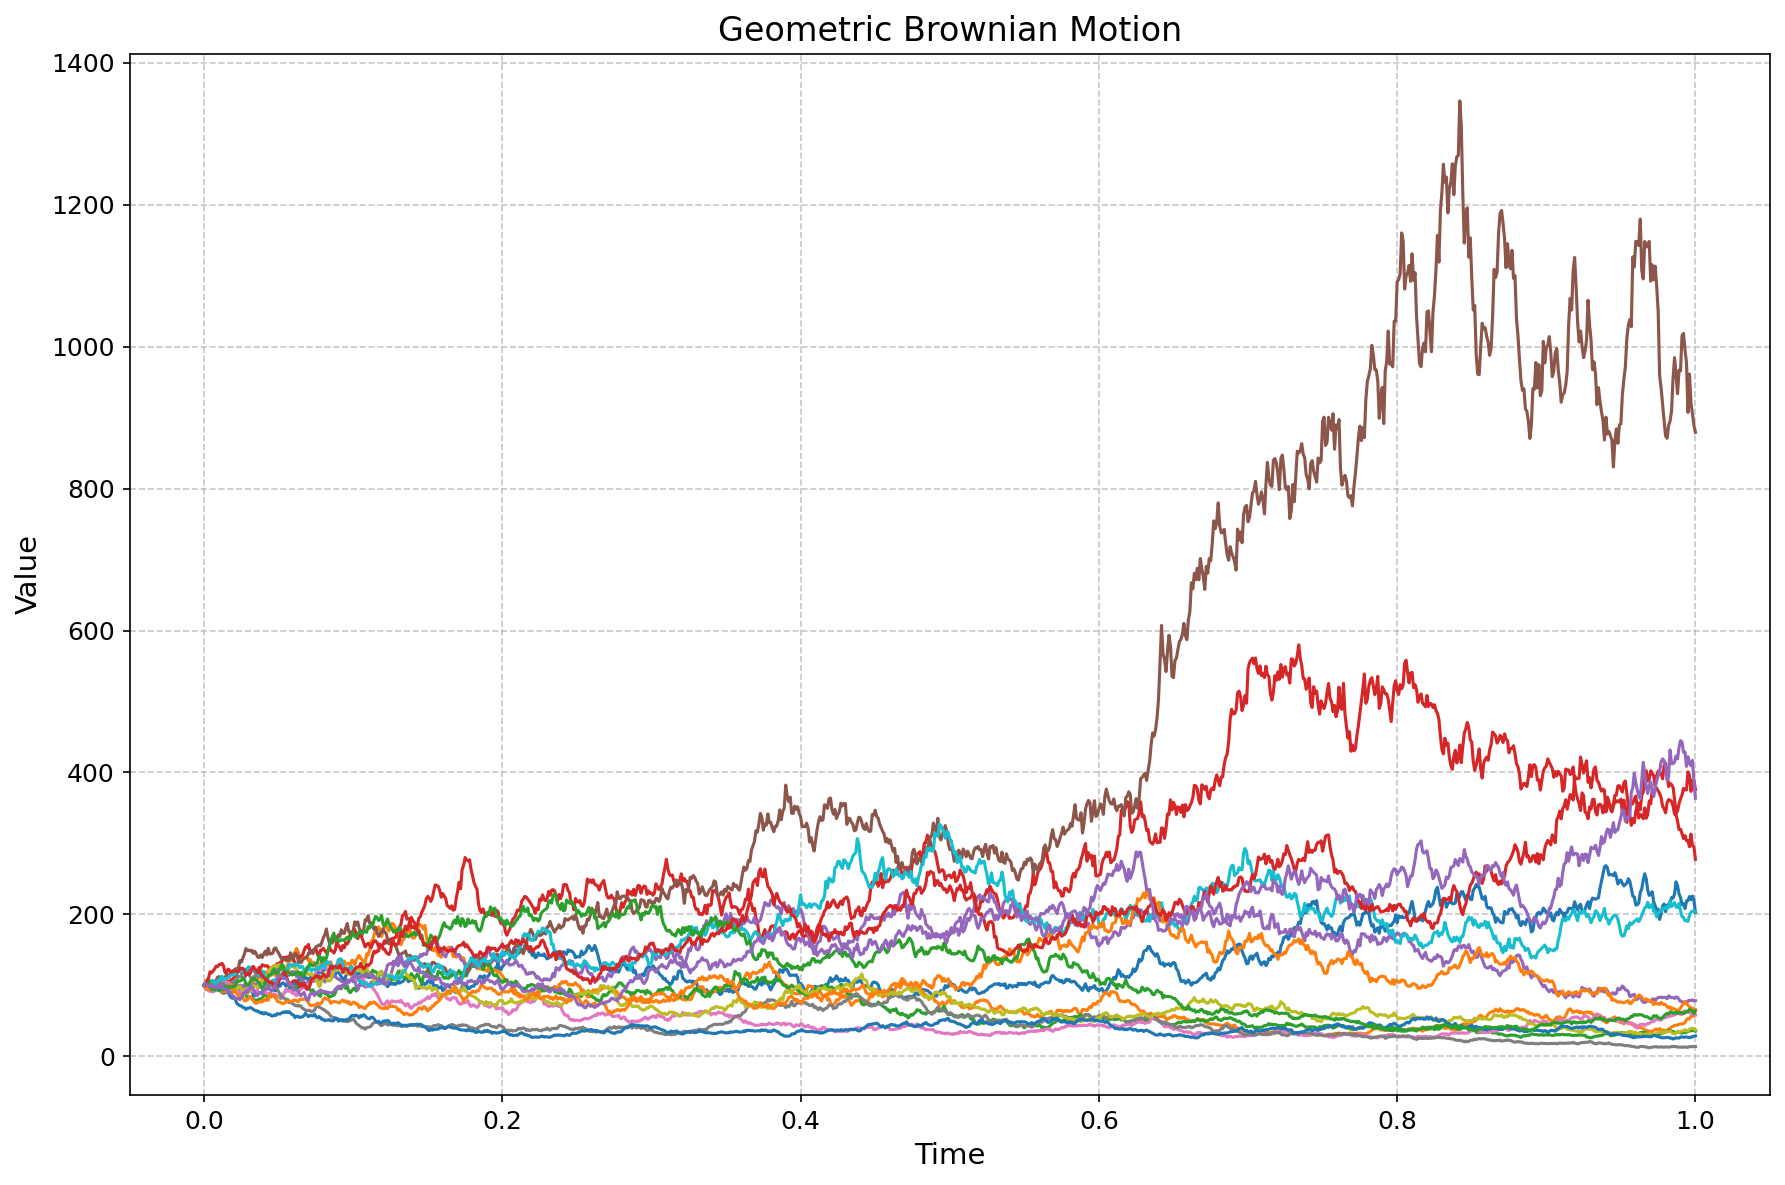

In [41]:
plt.figure(figsize=(12, 8), dpi=150)  # Larger size and higher DPI
plt.plot(timeGrid, np.transpose(S))
plt.grid(True, linestyle='--', alpha=0.7)  # Dashed grid for better readability
plt.title("Geometric Brownian Motion", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to fit elements nicely
plt.show()

## Simulating two correlated BMs 

To simulate two correlated BMs $B = (B^1, B^2)$, we define the matrix 
\begin{equation}
L = \begin{pmatrix}
1 & 0 \\
\rho & \sqrt{1-\rho^2}
\end{pmatrix}
\end{equation}
and simulate the vector $B$ by
\begin{equation}
B_{i+1} = B_i+ \sqrt{\Delta_t}L  Z_i= B_i+ \begin{pmatrix}
\sqrt{\Delta_t}Z_i^1 \\
\sqrt{\Delta_t}Z_i^1\rho +\sqrt{\Delta_t}Z_i^2\sqrt{1-\rho^2}
\end{pmatrix}
\end{equation}
where $Z_i=(Z_i^1, Z_i^2)^\top$ are independent bi-variate Gaussian rvs.

In [42]:
def GeneratePathsCorrelatedBM(NoOfSteps, T, rho, NoOfPaths = 1):    
    Z1 = np.random.normal(loc = 0.0, scale = 1.0, size = [NoOfPaths,NoOfSteps])
    Z2 = np.random.normal(loc = 0.0, scale = 1.0, size = [NoOfPaths,NoOfSteps])
    
    B1 = np.zeros([NoOfPaths, NoOfSteps+1])
    B2 = np.zeros([NoOfPaths, NoOfSteps+1])    
    
    dt = T / float(NoOfSteps)
    time = np.zeros([NoOfSteps+1])
    for i in range(0,NoOfSteps):
    
        # Correlate noise

        Z2[:,i]= rho * Z1[:,i] + np.sqrt(1.0 - rho**2) * Z2[:,i]
        
        B1[:,i+1] = B1[:,i] + np.power(dt, 0.5)*Z1[:,i]
        B2[:,i+1] = B2[:,i] + np.power(dt, 0.5)*Z2[:,i]
        
        time[i+1] = time[i] + dt
        
    # Store the results
    paths = {"time":time, "B1":B1, "B2":B2}
    
    return paths

In [50]:
# Define the parameters
T = 1 # Terminal time
m = 500 # Number of points - 1
N = 1 # Number of paths
rho = 0.1

In [51]:
Paths = GeneratePathsCorrelatedBM(m, T, rho, N)
timeGrid = Paths["time"]
B1 = Paths["B1"]
B2 = Paths["B2"]

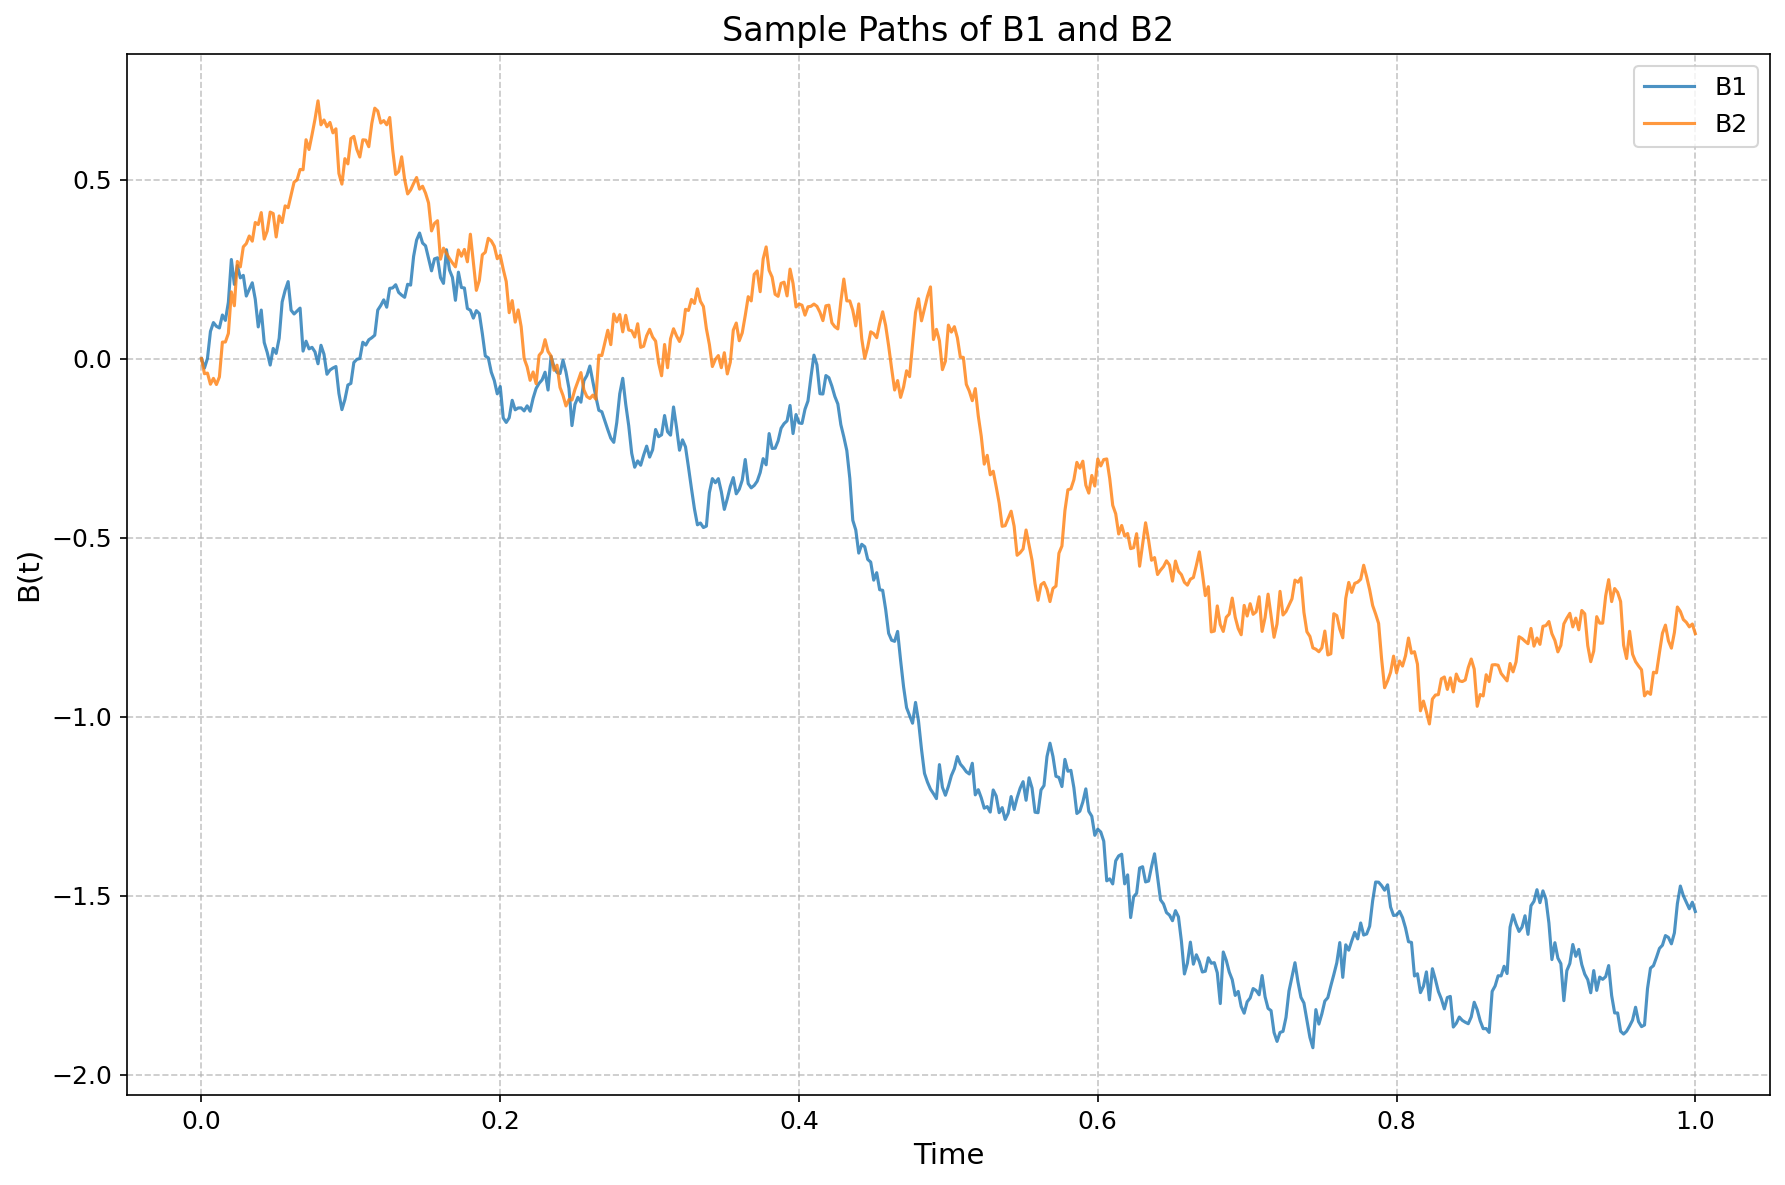

In [52]:
plt.figure(figsize=(12, 8), dpi=150)  # Larger figure size and higher DPI
plt.plot(timeGrid, np.transpose(B1), label="B1", alpha=0.8)  # Add label for legend and slight transparency
plt.plot(timeGrid, np.transpose(B2), label="B2", alpha=0.8)  # Add label for legend and slight transparency
plt.grid(True, linestyle='--', alpha=0.7)  # Dashed grid for subtle appearance
plt.xlabel("Time", fontsize=14)
plt.ylabel("B(t)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Sample Paths of B1 and B2", fontsize=16)
plt.legend(fontsize=12)  # Add a legend for clarity
plt.tight_layout()  # Adjust layout to fit elements nicely
plt.show()

## Simulating two correlated GBMs 

To simulate two correlated GBMs $S = (S_1, S_2)$, we define the matrix 
\begin{equation}
L = \begin{pmatrix}
1 & 0 \\
\rho & \sqrt{1-\rho^2}
\end{pmatrix}
\end{equation}
and 
\begin{equation}
\Sigma = \begin{pmatrix}
\sigma_1 & 0 \\
0 & \sigma_2
\end{pmatrix}
\end{equation}
and simulate the vector $S$ by
\begin{equation}
S(t_i) = S(t_{i-1})\exp\{(\mu - \frac{\sigma^2}{2}) \Delta t + \sqrt{\Delta} t \Sigma L  Z_i \}
\end{equation}
where $Z_i$ are independent bi-variate Gaussian rvs.

In [46]:
def GeneratePathsCorrelatedGBM(NoOfSteps, T, mu, sigma, S_0, rho, NoOfPaths = 1):    
    Z = np.random.normal(loc = 0.0, scale = 1.0, size = [NoOfPaths, NoOfSteps, 2])
    
    # We define X which is our BM with drift
    X = np.zeros([NoOfPaths, NoOfSteps+1, 2])
    time = np.zeros([NoOfSteps+1])
    
    L = np.diag(sigma).dot(np.array([[1, 0],[rho, np.sqrt(1-rho**2)]]))
    X[:,0, :] = np.log(S_0)
    
    dt = T / float(NoOfSteps)
    
    # We use the recursive formula from the notes
    for i in range(0,NoOfSteps):
        X[:,i+1, :] = X[:,i, :] + (mu - 0.5 * sigma**2) * dt + np.power(dt, 0.5) * np.transpose(L.dot(np.transpose(Z[:,i, :])))
        time[i+1] = time[i] + dt
        
    # Compute the exponent of X
    S = np.exp(X)
    
    paths = {"time":time,"S":S}
    
    return paths

In [60]:
# Define the parameters
T = 1 # Terminal time
m = 1000 # Number of points - 1
N = 1 # Number of paths
sigma = np.array([0.3, 0.5])
mu = np.array([0.5, 0.5])
S0 = np.array([100, 100])
rho = 0.3

In [61]:
# We use the function GenerateCorrPathsGBM to generate paths of two correlated geometric BM
paths = GeneratePathsCorrelatedGBM(m, T, mu, sigma, S0, rho, N)
timeGrid = paths['time']
S = paths['S']

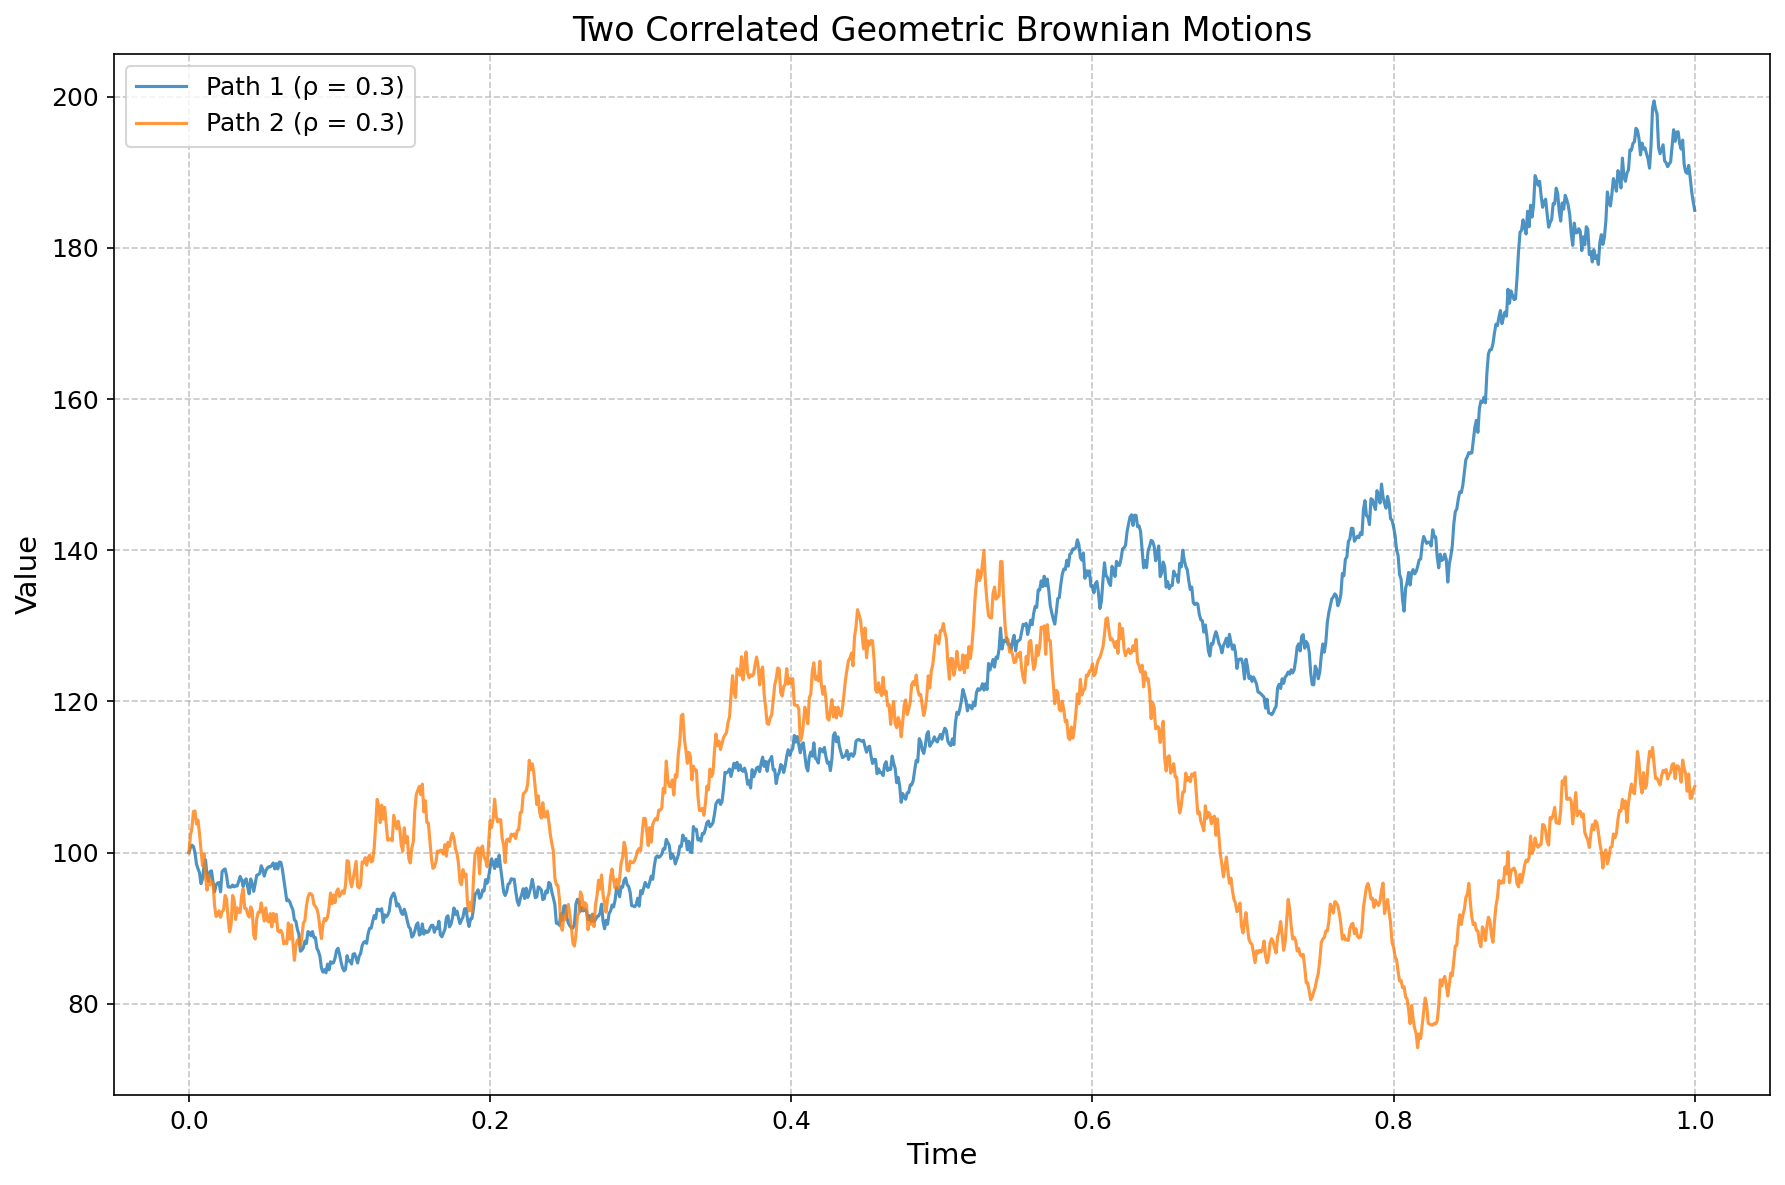

In [62]:
plt.figure(figsize=(12, 8), dpi=150)  # Larger figure size and higher DPI
plt.plot(timeGrid, np.transpose(S[:, :, 0]), label=f"Path 1 (ρ = {rho})", alpha=0.8)
plt.plot(timeGrid, np.transpose(S[:, :, 1]), label=f"Path 2 (ρ = {rho})", alpha=0.8)
plt.grid(True, linestyle='--', alpha=0.7)  # Subtle dashed grid
plt.title("Two Correlated Geometric Brownian Motions", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)  # Display the legend with ρ value
plt.tight_layout()  # Adjust layout to fit elements nicely
plt.show()